Dataset:
    Size_sqft  Bedrooms  Bathrooms  Age_years  Garage  Location_score   Price
0        850         2          1         30       0               5  140000
1        950         2          1         25       1               6  160000
2       1100         3          2         20       1               7  185000
3       1350         3          2         15       1               7  220000
4       1600         4          3         10       2               8  260000
5       1900         4          3          8       2               9  310000
6       2200         5          3          5       2               9  350000
7       2500         5          4          2       2              10  400000

Parameters learned (theta): [253125.          68163.4315461    4475.08746349  -3996.06638903
  -4364.89161505  -5927.04970795  20161.20654505]


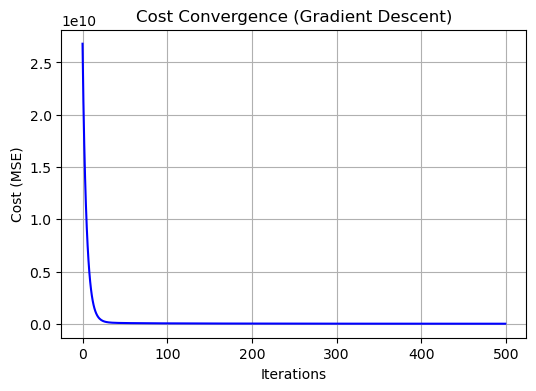

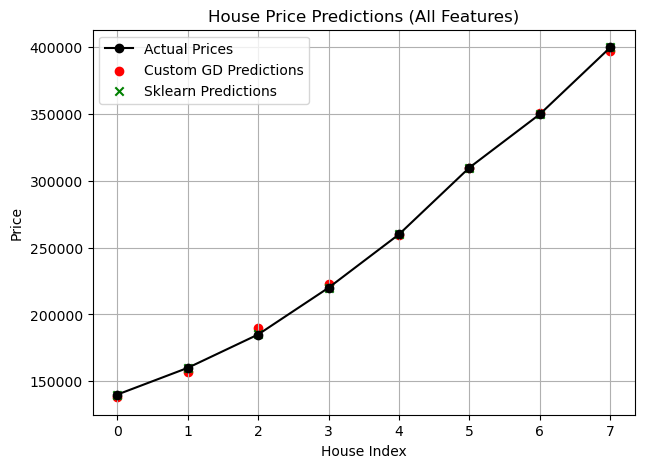

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


data = {
    'Size_sqft': [850, 950, 1100, 1350, 1600, 1900, 2200, 2500],
    'Bedrooms': [2, 2, 3, 3, 4, 4, 5, 5],
    'Bathrooms': [1, 1, 2, 2, 3, 3, 3, 4],
    'Age_years': [30, 25, 20, 15, 10, 8, 5, 2],
    'Garage': [0, 1, 1, 1, 2, 2, 2, 2],
    'Location_score': [5, 6, 7, 7, 8, 9, 9, 10],
    'Price': [140000, 160000, 185000, 220000, 260000, 310000, 350000, 400000]
}

df = pd.DataFrame(data)
print("Dataset:\n", df)

# Features (X) and Target (y)

X = df[['Size_sqft', 'Bedrooms', 'Bathrooms', 'Age_years', 'Garage', 'Location_score']].values
y = df['Price'].values.reshape(-1, 1)

# Normalize Features
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)

# Add intercept term
X_b = np.c_[np.ones((X_norm.shape[0], 1)), X_norm]

# Parameters
m, n = X_b.shape
theta = np.zeros((n, 1))
alpha = 0.1  # learning rate
iterations = 500
cost_history = []

# Cost Function

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    cost = (1/(2*m)) * np.sum(error**2)
    return cost


# Gradient Descent

for i in range(iterations):
    gradients = (1/m) * X_b.T.dot(X_b.dot(theta) - y)
    theta -= alpha * gradients
    cost_history.append(compute_cost(X_b, y, theta))

print("\nParameters learned (theta):", theta.ravel())


# Plot Cost Convergence

plt.figure(figsize=(6,4))
plt.plot(range(iterations), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Convergence (Gradient Descent)')
plt.grid(True)
plt.show()


# Predictions

model = LinearRegression()
model.fit(X, y)

custom_pred = X_b.dot(theta)
sklearn_pred = model.predict(X)


# Plot Predictions vs Actual

plt.figure(figsize=(7,5))
plt.plot(range(len(y)), y, color='black', linestyle='-', marker='o', label='Actual Prices')
plt.scatter(range(len(y)), custom_pred, color='red', label='Custom GD Predictions')
plt.scatter(range(len(y)), sklearn_pred, color='green', marker='x', label='Sklearn Predictions')
plt.xlabel('House Index')
plt.ylabel('Price')
plt.title('House Price Predictions (All Features)')
plt.legend()
plt.grid(True)
plt.show()